# Lab 4: Random Forest

In this Lab, you will implement a very simplified version of the Random Forest classifier. Make sure that you check the videos of lecture 4 before starting this Lab:
- Decision Tree and Random Forest: https://youtu.be/YSy9S2OsXNo

Random Forst (RF) works as follows:

- Given a dataset $X \in \mathbb{R}^{n \times d}$, RF selects randomly some features (i.e. `n_features`) from the dataset (where `n_features << d`). It also selects a random subset of the data (with `n_samples` data-points). Then, it builds a Decision Tree from those selected features and samples.

- Repeats this process `n_trees` times so that you have a number of `n_trees` Decision Trees built from different random combinations of features and different random subsets of data.

- To predict, RF takes each of the `n_trees` built Decision Trees and predict the outputs (classes); then it calculates the votes for each predicted class-label and takes the mode (most frequent label). In other words, considers the high voted predicted label as the final prediction from the random forest algorithm.

## Loading the dataset:
The code below will load a training dataset into variables `X` and `y` as usual.

In [1]:
%matplotlib notebook
import numpy as np

filename = "datasets/university-admission-dataset.csv"
mydata = np.genfromtxt(filename, delimiter=",")
X = mydata[:, :2]
y = mydata[:, -1]

""" TODO:
Print a small subset of X and y to see how the data looks like.
"""
print(X[:10], y[:10])
print(X[:10, 1])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]] [0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
[78.02469282 43.89499752 72.90219803 86.3085521  75.34437644 56.31637178
 96.51142588 46.55401354 87.42056972 43.53339331]


## Using sklearn.tree.DecisionTreeClassifier
To simplify the implementation of our Random Forest classifier, we will use an existing implementation of the `DecisionTreeClassifier` available in the sklearn library. Read the following code to see an example of how to use the `DecisionTreeClassifier`.

<IPython.core.display.Javascript object>


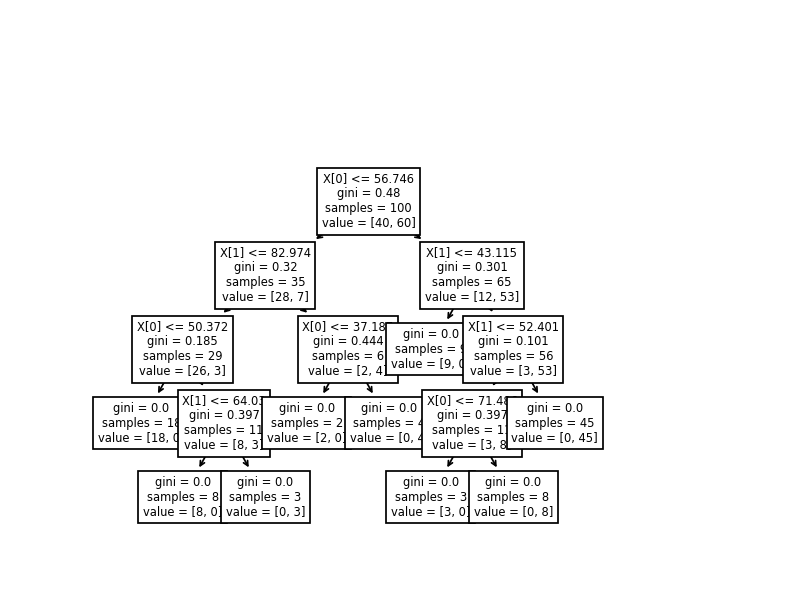

Predictions: [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
Training Accuracy: 100.0%


In [2]:
""" TODO:
Read and run the following example code to see how to use a 
simple DecisionTreeClassifier to make predictions.
"""

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0).fit(X, y) # Training
preds = clf.predict(X) # Predicting
tree.plot_tree(clf) # For fun
print("Predictions:", preds)

acc = np.mean(preds == y) * 100
print("Training Accuracy: {}%".format(acc))

## Implementing a simplified random forest classifier
Complete the code below to implement a random forest classifier.

In Python, to select a list of `k` random integers between `0` and `nbr` (excluded), you can use `ids = np.random.choice(nbr, k, replace=False)`. The keyword `replace=False` means that we don't want to select the same number more than once (so, ids with contain `k` unique integers).

Also, to compute the mode (most common or frequent label), you can make use of the function `scipy.stats.mode` if you want. Read its documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html


In [3]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier


""" TODO:
Complete the definition of the function train(...) which allows to train an ensemble 
of decision tree classifiers. Each trained decision tree clf is saved together with 
its corresponding features indices (used to train clf) into the list clfs.

Arguments:
*** X: the training dataset.
*** y: the training labels corresponding to X.
*** n_features: the number of features to select randomly to build a decision tree.
*** n_samples: the number of instances to select randomly to build a decision tree.
*** n_trees: the number of decision trees to build.
"""
def train_(X, y, n_features, n_samples, n_trees):
    n, d = X.shape # n: number of rows, and d: number of columns
    clfs = [] # used to store the decision trees with their corresponding features indices.
    #print(d)
    for itr in range(n_trees):
        # TODO: select randomly n_features indices between 0 and d and store them in ids_columns
        ids_columns = np.random.choice(d, n_features, replace=False) # you can use np.random.choice here
        #print("ids_columns", ids_columns)
        
        # TODO: select randomly n_samples indices between 0 and n and store them in ids_samples
        ids_samples = np.random.choice(n, n_samples, replace=False) # you can use np.random.choice here
        
       # print(ids_samples)
        # TODO: select the subset of X corresponding to the rows ids_samples and the columns ids_columns
       # Xsub = np.array([X[ids_samples, ids_columns]]).T
        #print(Xsub.shape) should give 50 rows and 1 column
        #print(ids_columns)
        Xsub = X[ids_samples]
        Xsub = np.array(Xsub[:, ids_columns])
        #print(Xsub[:, ids_columns])
        #print()
       # Xsub = np.array(X[ids_samples, ids_columns]).reshape(-1, n_features)
       # Xsub = np.array(X[ids_samples, ids_columns]).reshape(-1, n_features)
        #Xsub = np.reshape(Xsub, (-1, 2))
        # TODO: select the subset of y corresponding to ids_samples
       # ysub = np.array([y[ids_samples]]).T
      #  print(ysub.shape) # Should give 50 rows and 1 column
        ysub = np.array(y[ids_samples])
      #  ysub = np.reshape()
        # TODO: train a decision tree classifier clf, based on the training subset: Xsub, ysub
        clf = DecisionTreeClassifier().fit(Xsub, ysub)
        
        
        # TODO: save the trained decision tree classifier (clf) and the corresponding 
        # feature indices (ids_columns) used to train this classifier, into the list clfs.
        clfs.append((clf, ids_columns))
        
    return clfs


""" TODO:
Complete the definition of the function predict(clfs, X) which allows to predict the class-labels 
for the instances in the given dataset X, using the ensemble clfs returned by your function previous function.
"""
def predict(clfs, X):
   # print(len(clfs))
    pred = [(t[0].predict(X[:, t[1]])) for t in clfs]
    predictions = stats.mode(pred)[0]
    return predictions


""" TODO:
Uncomment the code below to test your functions:
"""
clfs = train_(X, y, n_features=1, n_samples=50, n_trees=10)
y_pred = predict(clfs, X)
acc = np.mean(y_pred == y) * 100
print("Training Accuracy: {}%".format(acc))

Training Accuracy: 93.0%


## Optional: Testing your implementation a dataset with multiple features
This part is optional.

Test you random forest implementation on a dataset with more features (e.g. you can add more polynomial features to the previous dataset or use any other dataset with a high number of features).

Compute the generalization accuracy of your random forest on that dataset using a 10-fold-cross-validation.

In [4]:
file = "datasets/heart.csv" # Dataset containing heart attributes, and target value (y) is either 1 or 0 (heart disease or not)
mydata = np.genfromtxt(file, delimiter=",")
X = mydata[1:, :13]
y = mydata[1:, -1]

In [76]:
# Splitting into 10 parts, each part contains 30 data points (303 / 10), train on 9 parts and evaluate on the last one

k=10
splits = int(np.floor(len(X) / k))
#print(splits)
# Splitting the data
gen_accu = []
for i in range(k): 
    X_test, y_test = X[i*splits : (i+1)*splits], y[i*splits : (i+1)*splits]
    
    # There is probably a more efficient way to get the training data than my solution
    X_train, y_train = np.append(X[:i*splits], X[(i+1)*splits:], axis=0), np.append(y[:i*splits] , y[(i+1)*splits:], axis=0)
   # print("X and y train", len(X_train), len(y_train))
    #print("X and y test:", len(X_test), len(y_test))
    tree_model = train_(X_train, y_train, n_features=13, n_samples=50, n_trees=20)
    y_pred = predict(tree_model, X_test)
    gen_accu.append(np.mean(y_pred == y_test) * 100)

print("Avg accuracy with my implementation: {}".format(np.mean(gen_accu))) 

Avg accuracy with my implementation: 74.66666666666667


In [75]:
k = 10
from sklearn.model_selection import KFold 
cv = KFold(n_splits=k)
gen_accuracy = []
for train_index, test_index in cv.split(X):
    Xtrain, Xtest, ytrain, ytest = X[train_index], X[test_index], y[train_index], y[test_index]
    tree_model = train_(Xtrain, ytrain, n_features=13, n_samples=50, n_trees=20)
    y_pred = predict(tree_model, Xtest)
    acc = np.mean(y_pred == ytest) * 100
    gen_accuracy.append(acc)
    
print("Avg accuracy using sklearn KFold: {}".format(np.mean(gen_accuracy)))

Avg accuracy using sklearn KFold: 77.20430107526883
